<a href="https://colab.research.google.com/github/CoffeE23/ML-Projects/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating neural network from scratch with python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the dataset 

import csv
import pandas as pd

# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('/content/drive/My Drive/heart.dat', sep=' ', names=headers)
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [ ]:
#Getting shape of the data
heart_df.shape

(270, 14)

In [ ]:
#Looking for the null values through the dataset because neural net require non null variables
heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [ ]:
#Splitting the dataset into training and test parts
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#convert imput to numpy arrays
X = heart_df.drop(columns=['heart_disease'])

#replace target class with 0 and 1 
#1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


In [ ]:
#Implementing Neural network class

class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        
    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)
    
    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1.0/(1.0+np.exp(-Z))
    
    def entropy_loss(self,y, yhat):
        nsample = len(y)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
        return loss
    
    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
    
    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        def dRelu(x):
            x[x<=0] = 0
            x[x>0] = 1
            return x
        
        dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat)))
        dl_wrt_sig = yhat * (1-yhat)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

        dl_wrt_z1 = dl_wrt_A1 * dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)
        
        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
        
    
    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
            
    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 
        
    
    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

In [ ]:
nn = NeuralNet() # create the NN model
nn.fit(Xtrain, ytrain) #train the model

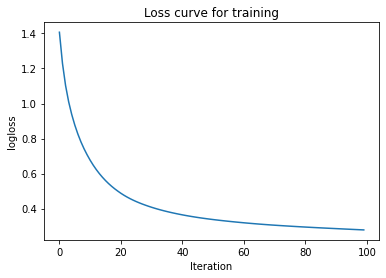

In [ ]:
nn.plot_loss()

In [ ]:
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

Train accuracy is 87
Test accuracy is 75


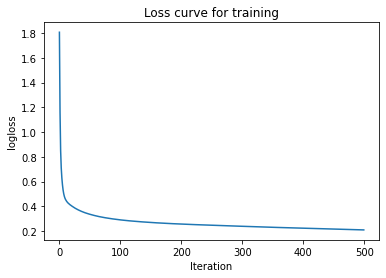

In [ ]:
nn_1 = NeuralNet(layers=[13,10,1], learning_rate=0.001, iterations=500) # create the NN model
nn_1.fit(Xtrain, ytrain) #train the model
nn_1.plot_loss()

In [ ]:
train_pred = nn_1.predict(Xtrain)
test_pred = nn_1.predict(Xtest)
#print(Xtrain)
#print(Xtest)
#print(train_pred)
#print(test_pred)
print("Train accuracy is {}".format(nn_1.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn_1.acc(ytest, test_pred)))

Train accuracy is 90
Test accuracy is 74


In [ ]:
#Creating neural net with python libraries

In [ ]:
#With scikit learn - with multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

sknet = MLPClassifier(hidden_layer_sizes=(8), learning_rate_init=0.001, max_iter=100)

In [ ]:
sknet.fit(Xtrain, ytrain)
preds_train = sknet.predict(Xtrain)
preds_test = sknet.predict(Xtest)

print("Train accuracy of sklearn neural network: {}".format(round(accuracy_score(preds_train, ytrain),2)*100))
print("Test accuracy of sklearn neural network: {}".format(round(accuracy_score(preds_test, ytest),2)*100))


Train accuracy of sklearn neural network: 85.0
Test accuracy of sklearn neural network: 69.0


In [ ]:
#With Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# define the model
model = Sequential()
model.add(Dense(8, input_shape=(13,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(Xtrain, ytrain, epochs=100, verbose=1)
train_acc = model.evaluate(Xtrain, ytrain, verbose=1)[1]
# print(train_acc)
test_acc = model.evaluate(Xtest, ytest, verbose=1)[1]
# print(test_acc)
print("Train accuracy of keras neural network: {}".format(round((train_acc * 100), 2)))
print("Test accuracy of keras neural network: {}".format(round((test_acc * 100),2)))

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 1.2991 - accuracy: 0.3006
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2855 - accuracy: 0.3158
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 1.1470 - accuracy: 0.3402
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1.0665 - accuracy: 0.3553
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9774 - accuracy: 0.3995
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9541 - accuracy: 0.4292
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8528 - accuracy: 0.4516
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8360 - accuracy: 0.4717
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7547 - accuracy: 0.5167
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.5897
Epoch 11/100
7/7 [===========

In [ ]:
#How to save Keras models
#save model and architecture to single file
model.save("/content/drive/My Drive/ANN/model_1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#How to load saved keras model and use it again
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model("/content/drive/My Drive/ANN/model_1.h5")
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
